Head of the DataFrame:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

DataFrame with date as index:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


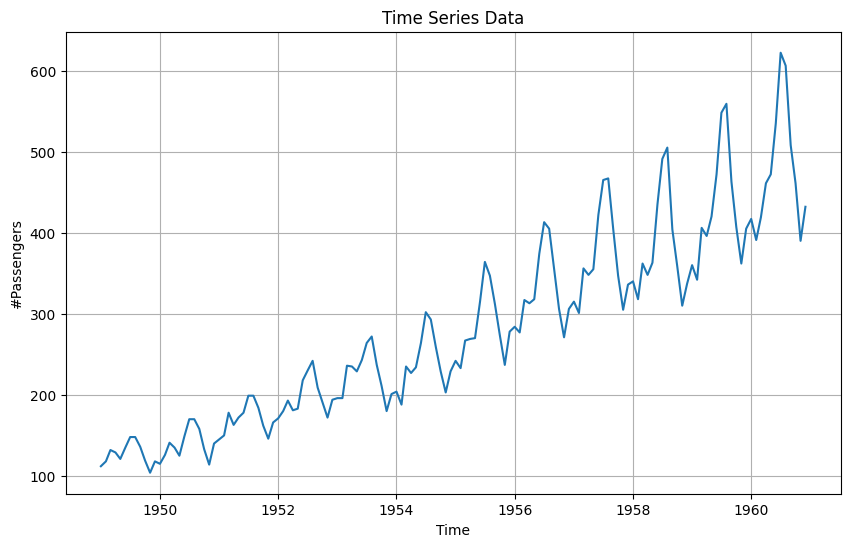


Decomposition results (first few values):
Trend:
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: trend, dtype: float64

Seasonal:
Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
Name: seasonal, dtype: float64

Residual:
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: resid, dtype: float64


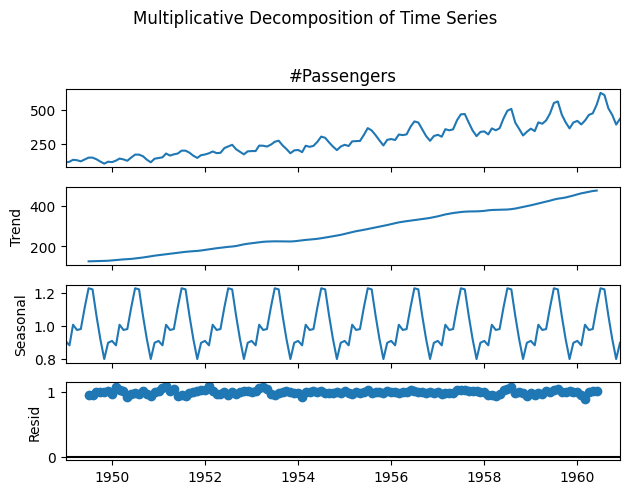

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/AirPassengers.csv'  # Corrected extension to .csv
date_column = 'Month'
value_column = '#Passengers'  # Corrected to match the column name in your sample data
date_format = '%Y-%m'
frequency = 12
decomposition_model = 'multiplicative'

# --- Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Head of the DataFrame:")
    print(df.head())

    # Convert the date column to datetime objects and set as index
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    df.set_index(date_column, inplace=True)
    print("\nDataFrame with date as index:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the CSV file. Please check the column names.")
    exit()
except ValueError as e:
    print(f"Error: Could not parse date. Please check the 'date_format' variable. Details: {e}")
    exit()

# --- Plot the data ---
if 'df' in locals():  # Ensure df was created successfully
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[value_column])
    plt.title("Time Series Data")
    plt.xlabel("Time")
    plt.ylabel(value_column)
    plt.grid(True)
    plt.show()

    # --- Decompose the time series ---
    try:
        decomposition = seasonal_decompose(df[value_column], model=decomposition_model, period=frequency)
        print("\nDecomposition results (first few values):")
        print("Trend:")
        print(decomposition.trend.head())
        print("\nSeasonal:")
        print(decomposition.seasonal.head())
        print("\nResidual:")
        print(decomposition.resid.head())

        decomposition.plot()
        plt.suptitle(f"{decomposition_model.capitalize()} Decomposition of Time Series", y=1.02)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during decomposition: {e}. Ensure your data has enough periods for decomposition.")
else:
    print("Error: DataFrame 'df' was not loaded. Check the file path and loading errors.")